In [30]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### TopUniversities.com (QS)


In [31]:
# input: link to the university details page where we can find the detail numbers
# returns an array as follows: [total_academic_fac_staff, inter_academic_fac_staff, total_students, inter_students]
def get_details(link):
    link = link + '#wurs'
    r = requests.get(link)
    page_body = r.text

    soup = BeautifulSoup(page_body, 'html.parser')
    
    # will contain total_academic_fac_staff, inter_academic_fac_staff, total_students, inter_students
    results = []
    for name in ['total faculty', 'inter faculty', 'total student', 'total inter']:
        try:
            elem = np.float(soup.find('div', class_= name).find('div', class_='number').text.replace(',',''))
        except AttributeError:
            elem = None
        results.append(elem)
    return results

In [32]:
# send a request to get the content of the ranking list
# We found the correct url where to send the request using postman and checking the different requests that were sent
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt')
page_body = r.text
json_data = r.json()
cols = ['QSrank', 'region', 'country', 'Faculty members (total)', 'Faculty members (inter.)', 'Students (total)', 'Students (inter.)']
df_QS = pd.DataFrame(columns=cols)


# for each univerity in the list, get basic attributes and try to get the details
# We had to discard one university with the above ranking check. Thus we also take the 201th university to have the actual top-200
for i, uni in enumerate(json_data['data'][:201]):
    soup = BeautifulSoup(uni['uni'], 'html.parser')
    details_link = 'https://www.topuniversities.com' + soup.a['href']
    name = soup.a.string
    country = uni['location']
    region = uni['region']
    rank = np.float(uni['overall_rank'])
    details = get_details(details_link)
    # we saw that for some reason the uni ranked 281 appeared in the top-200.
    # this check avoids having it in our ranking
    if int(rank) <= 201:
        df_QS.loc[name] = ([rank, region, country] + details)
    print("Progression: " + '{0:.1f}'.format(100*(i+1)/200.0) + "%", end="\r")
#print("Progression: Done!", end="\r")

In [33]:
#df[pd.isnull(df['Faculty members (inter.)'])]
df_QS.head(5)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.)
Massachusetts Institute of Technology (MIT),1.0,North America,United States,2982.0,1679,11067.0,3717.0
Stanford University,2.0,North America,United States,4285.0,2042,15878.0,3611.0
Harvard University,3.0,North America,United States,4350.0,1311,22429.0,5266.0
California Institute of Technology (Caltech),4.0,North America,United States,953.0,350,2255.0,647.0
University of Cambridge,5.0,Europe,United Kingdom,5490.0,2278,18770.0,6699.0


In [34]:
#Top 10 universities with the largest fac members/students ratio
df_QS['Fac members/Students ratio'] = df_QS['Faculty members (total)']/df_QS['Students (total)']
resultfirstratio = df_QS.sort_values('Fac members/Students ratio' , ascending = False )
resultfirstratio.head(10)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.),Fac members/Students ratio
California Institute of Technology (Caltech),4.0,North America,United States,953.0,350,2255.0,647.0,0.422616
Yale University,16.0,North America,United States,4940.0,1708,12402.0,2469.0,0.398323
University of Oxford,6.0,Europe,United Kingdom,6750.0,2964,19720.0,7353.0,0.342292
University of Cambridge,5.0,Europe,United Kingdom,5490.0,2278,18770.0,6699.0,0.292488
Johns Hopkins University,17.0,North America,United States,4462.0,1061,16146.0,4105.0,0.276353
Stanford University,2.0,North America,United States,4285.0,2042,15878.0,3611.0,0.269870
Massachusetts Institute of Technology (MIT),1.0,North America,United States,2982.0,1679,11067.0,3717.0,0.269450
University of Rochester,186.0,North America,United States,2569.0,488,9636.0,2805.0,0.266604
University of Pennsylvania,19.0,North America,United States,5499.0,1383,20639.0,4250.0,0.266437
Columbia University,18.0,North America,United States,6189.0,913,25045.0,8105.0,0.247115


In [35]:
#Top 10 universities with the largest international students ratio
df_QS['International students ratio'] = df_QS['Students (inter.)']/df_QS['Students (total)']
resultsecondratio = df_QS.sort_values('International students ratio' , ascending = False )
resultsecondratio.head(10)

,QSrank,region,country,Faculty members (total),Faculty members (inter.),Students (total),Students (inter.),Fac members/Students ratio,International students ratio
London School of Economics and Political Science (LSE),35.0,Europe,United Kingdom,1088.0,687,9760.0,6748.0,0.111475,0.691393
Ecole Polytechnique Fédérale de Lausanne (EPFL),12.0,Europe,Switzerland,1695.0,1300,10343.0,5896.0,0.163879,0.570047
Imperial College London,8.0,Europe,United Kingdom,3930.0,2071,16090.0,8746.0,0.244251,0.543567
Maastricht University,200.0,Europe,Netherlands,1277.0,502,16385.0,8234.0,0.077937,0.502533
Carnegie Mellon University,47.0,North America,United States,1342.0,425,13356.0,6385.0,0.100479,0.478062
UCL (University College London),7.0,Europe,United Kingdom,6345.0,2554,31080.0,14854.0,0.204151,0.477928
University of St Andrews,92.0,Europe,United Kingdom,1140.0,485,8800.0,4030.0,0.129545,0.457955
The University of Melbourne,41.0,Oceania,Australia,3311.0,1477,42182.0,18030.0,0.078493,0.427434
Queen Mary University of London,127.0,Europe,United Kingdom,1885.0,801,16135.0,6806.0,0.116827,0.421816
The University of Hong Kong,26.0,Asia,Hong Kong,3012.0,2085,20214.0,8230.0,0.149006,0.407144


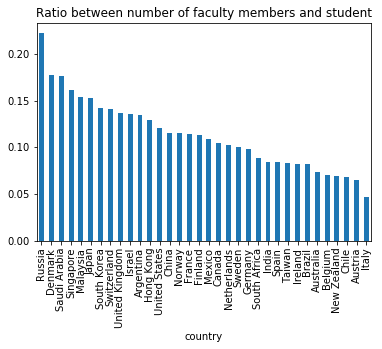

In [36]:
#Compute the ratio between faculty members and students per country
Country_facmembers = df_QS.groupby('country')['Faculty members (total)'].sum()
Country_students = df_QS.groupby('country')['Students (total)'].sum()
Country_facmembers.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Ratio between number of faculty members and student')

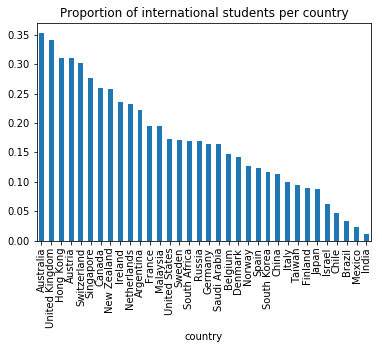

In [37]:
#Compute the ratio of international students per country
Country_intstudents = df_QS.groupby('country')['Students (inter.)'].sum()
Country_intstudents.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Proportion of international students per country')

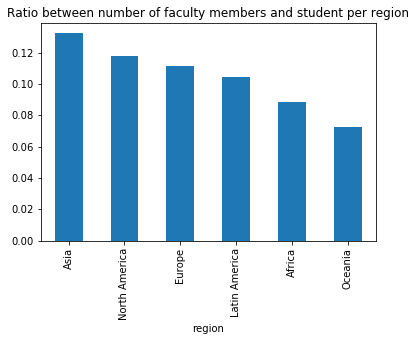

In [38]:
#Compute the ratio between faculty members and students per region
Region_facmembers = df_QS.groupby('region')['Faculty members (total)'].sum()
Region_students = df_QS.groupby('region')['Students (total)'].sum()
Region_facmembers.div(Region_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Ratio between number of faculty members and student per region')

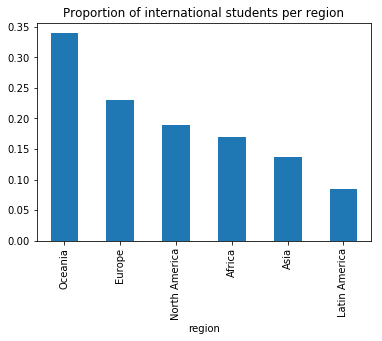

In [39]:
#Compute the ratio of international students per region
Region_intstudents = df_QS.groupby('region')['Students (inter.)'].sum()
Region_intstudents.div(Region_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Proportion of international students per region')

### Times Higher education (TH)


In [40]:
# Make the request
r = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
page_body = r.text
page_body[:800]

soup = BeautifulSoup(page_body, 'html.parser')

In [41]:
json_data = r.json()

In [42]:
cols = ['THrank',  'country', 'Students (total)', 'Students (inter.)','International students ratio', 'Fac members/Students ratio','Faculty members (total)',]
df_TH = pd.DataFrame(columns=cols)


# for each univerity in the list, get basic attributes and try to get the details
for i, uni in enumerate(json_data['data'][:200]):
    name = uni['name']
    country = uni['location']
    THrank = np.float16(uni['rank'].replace('=',''))
    students_tot = np.float16(uni['stats_number_students'].replace(',',''))
    student_int_ratio = np.float16(uni['stats_pc_intl_students'][:-1])/100
    student_staff_ratio = np.float(uni['stats_student_staff_ratio'])
    staff_number = np.float16(students_tot/student_staff_ratio)
    int_student = np.float16(students_tot*student_int_ratio)
    
    df_TH.loc[name] = ([THrank, country, students_tot, int_student, student_int_ratio, student_staff_ratio,staff_number])
    print("Progression: " + '{0:.1f}'.format(100*(i+1)/200.0) + "%", end="\r")

In [43]:
df_TH.head()

,THrank,country,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
University of Oxford,1.0,United Kingdom,20416.0,7760.0,0.38,11.2,1823.00
University of Cambridge,2.0,United Kingdom,18384.0,6436.0,0.35,10.9,1687.00
California Institute of Technology,3.0,United States,2208.0,596.0,0.27,6.5,339.75
Stanford University,3.0,United States,15848.0,3486.0,0.22,7.5,2114.00
Massachusetts Institute of Technology,5.0,United States,11176.0,3800.0,0.34,8.7,1285.00


In [44]:
#Top 10 universities with the largest fac members/students ratio
resultfirstratio = df_TH.sort_values('Fac members/Students ratio' , ascending = True )
resultfirstratio.head(10)

,THrank,country,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
Vanderbilt University,105.0,United States,12008.0,1561.0000,0.13,3.3,3638.0000
University of Copenhagen,109.0,Denmark,30400.0,4256.0000,0.14,4.1,7416.0000
Johns Hopkins University,13.0,United States,15496.0,3720.0000,0.24,4.3,3604.0000
Yale University,12.0,United States,12152.0,2552.0000,0.21,4.3,2826.0000
University of Rochester,153.0,United States,9632.0,2794.0000,0.29,4.3,2240.0000
Emory University,98.0,United States,12648.0,2404.0000,0.19,4.4,2874.0000
Duke University,17.0,United States,15256.0,3356.0000,0.22,4.5,3390.0000
École Polytechnique,115.0,France,2800.0,1008.0000,0.36,5.1,549.0000
Scuola Normale Superiore di Pisa,184.0,Italy,515.0,36.0625,0.07,5.2,99.0625
University of Pittsburgh,100.0,United States,26368.0,2636.0000,0.10,5.9,4468.0000


In [45]:
#Top 10 universities with the largest international students ratio
df_TH['International students ratio'] = df_TH['Students (inter.)']/df_TH['Students (total)']
resultsecondratio = df_TH.sort_values('International students ratio' , ascending = False )
resultsecondratio.head(10)

,THrank,country,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
London School of Economics and Political Science,25.0,United Kingdom,10064.0,7144.0,0.709857,12.2,825.00
University of Luxembourg,179.0,Luxembourg,4968.0,2832.0,0.570048,14.6,340.25
École Polytechnique Fédérale de Lausanne,38.0,Switzerland,9928.0,5460.0,0.549960,11.2,886.50
Imperial College London,8.0,United Kingdom,15856.0,8720.0,0.549950,11.4,1391.00
Maastricht University,103.0,Netherlands,16720.0,8360.0,0.500000,18.0,929.00
University College London,16.0,United Kingdom,30304.0,14848.0,0.489968,10.5,2886.00
University of St Andrews,143.0,United Kingdom,9008.0,4324.0,0.480018,13.0,693.00
Carnegie Mellon University,24.0,United States,12672.0,5704.0,0.450126,13.5,938.50
Queen Mary University of London,121.0,United Kingdom,15408.0,6932.0,0.449896,13.3,1158.00
University of Hong Kong,40.0,Hong Kong,18368.0,7716.0,0.420078,18.0,1020.50


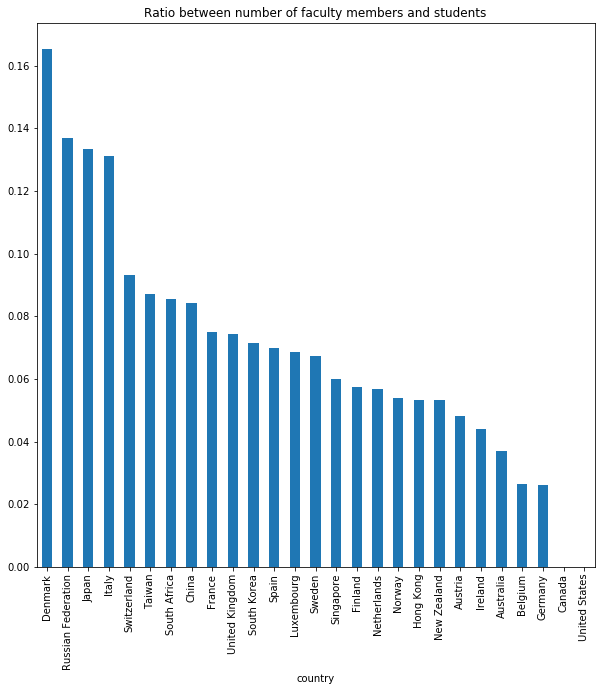

In [46]:
#Compute the ratio between faculty members and students per country
Country_facmembers = df_TH.groupby('country')['Faculty members (total)'].sum()
Country_students = df_TH.groupby('country')['Students (total)'].sum()
plt.figure(figsize=[10,10])
Country_facmembers.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Ratio between number of faculty members and students')

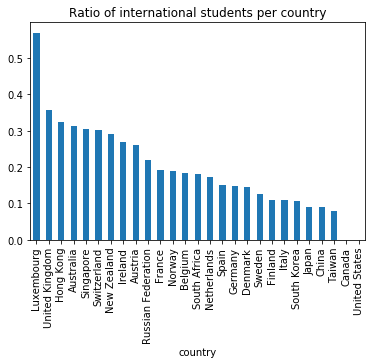

In [47]:
#Compute the ratio of international students per country
Country_intstudents = df_TH.groupby('country')['Students (inter.)'].sum()
Country_intstudents.div(Country_students).sort_values(ascending=False).plot(kind = 'bar')
plt.title('Ratio of international students per country')

## Observations : 
TODO
- The 
- 

### Merging the two datasets


In [48]:
df_TH.corr()

,THrank,Students (total),Students (inter.),International students ratio,Fac members/Students ratio,Faculty members (total)
THrank,1.000000,-0.142104,-0.323256,-0.217576,0.107456,-0.248244
Students (total),-0.142104,1.000000,0.555706,-0.289645,0.275881,0.541299
Students (inter.),-0.323256,0.555706,1.000000,0.518768,0.142464,0.246370
International students ratio,-0.217576,-0.289645,0.518768,1.000000,-0.121333,-0.210679
Fac members/Students ratio,0.107456,0.275881,0.142464,-0.121333,1.000000,-0.438958
Faculty members (total),-0.248244,0.541299,0.246370,-0.210679,-0.438958,1.000000


The most important correlation with the TH rank is the number of international students. The ratio between FAC members and student is positive because the ratio is smaller for a smaller number of students per teacher. 

In [49]:
df_QS.corr()

,QSrank,Faculty members (total),Students (total),Students (inter.),Fac members/Students ratio,International students ratio
QSrank,1.000000,-0.316445,-0.039802,-0.309609,-0.420908,-0.369209
Faculty members (total),-0.316445,1.000000,0.764622,0.471808,0.260203,-0.069686
Students (total),-0.039802,0.764622,1.000000,0.558612,-0.315515,-0.171006
Students (inter.),-0.309609,0.471808,0.558612,1.000000,-0.177791,0.539897
Fac members/Students ratio,-0.420908,0.260203,-0.315515,-0.177791,1.000000,0.128050
International students ratio,-0.369209,-0.069686,-0.171006,0.539897,0.128050,1.000000


The total number of students has no importantce in the QS ranking of the universities. However, the ratio of students over faculty members is highly negative. The number of faculty members and international students is ghly correlated with the ranking

## String matching algorithm

In [50]:
import string
import re
from difflib import SequenceMatcher as SM

# returns a version of the string cleaned of all the words/characters that
# do not give any information about the uni and can make it differ from its matching
def clean_string(elem, pattern):
    # replace - by space
    clean_elem = re.sub('[–-]', ' ', elem)
    # remove all that is inside parenthesis (if it's at least 5 characters)
    clean_elem = re.sub(r'\(.{0,5}?\)', '', clean_elem)
    # to lowercase
    clean_elem = clean_elem.lower()
    # remove accents
    clean_elem = re.sub('[\é\è]', 'e', clean_elem)
    clean_elem = re.sub('[ä]', 'a', clean_elem)
    clean_elem = re.sub('[ü]', 'u', clean_elem)
    clean_elem = re.sub('[ö]', 'o', clean_elem)
    # remove all punctuation
    clean_elem = "".join([c for c in clean_elem if c in string.ascii_letters or c in string.whitespace])
    # remove all linking words that are not useful to disinguish universities and can cause issues
    words = [x for x in clean_elem.split() if re.match(pattern, x) is None]
    clean_elem = ' '.join(words)
    # if a space remains at the end of the string, remove it. Also remove double spaces
    clean_elem = re.sub('[ ]{2,}', ' ', clean_elem)
    if clean_elem[-1] == ' ':
        clean_elem = clean_elem[:-1]
    return clean_elem

In [51]:
# creating the two lists and a dictionary for the matchings
a = df_QS.index.values.tolist()
b = df_TH.index.values.tolist()
matchings = dict()
for elem in a:
    matchings[elem] = None

# The words that we want to get rid of when we clean the name
pattern = r'[uU]niversit(y|at|aet)|(\bof\b)|\b([tT]he)\b|(\bzu\b)|(\bat\b)'

# first match and extract all perfect matchings and names that match after cleaning them
for elemA in a:
    for elemB in b.copy():
        if elemA == elemB or clean_string(elemA, pattern) == clean_string(elemB, pattern):
            matchings[elemA] = elemB
            b.remove(elemB)
print(str(200 - len(b)) + ' elements out of 200 are matched')

141 elements out of 200 are matched


In [52]:
# fuzzy matching
# TODO document this section
threshold = 0.67
# loop over TH university names
for elemB in b.copy():
    max_ratio = 0
    best_match = None
    # check for the name in the QS directory that matches the best elemB if it exists
    for elemA in a:
        match_ratio = SM(None, clean_string(elemA, pattern), clean_string(elemB, pattern)).ratio()
        if match_ratio > threshold and match_ratio > max_ratio and matchings[elemA] is None:
            max_ratio = match_ratio
            best_match = elemA
    # if a match has been found save the index in matchings dictionary
    if best_match is not None:
        matchings[best_match] = elemB
        b.remove(elemB)
        #print(best_match + " -> " + elemB + " " + str(int(max_ratio*100)))

print(str(200 - len(b)) + ' elements out of 200 are matched')
        

154 elements out of 200 are matched


In [53]:
# remaining universities
for elemB in b:
    matchings[elemB] = None

In [69]:
for key in matchings:
    #print(key + ' -> ' + str(matchings[key]))
    print(key)
    print(str(matchings[key]))
    print()

Massachusetts Institute of Technology (MIT) 
Massachusetts Institute of Technology

Stanford University
Stanford University

Harvard University
Harvard University

California Institute of Technology (Caltech)
California Institute of Technology

University of Cambridge
University of Cambridge

University of Oxford
University of Oxford

UCL (University College London)
University College London

Imperial College London
Imperial College London

University of Chicago
University of Chicago

ETH Zurich - Swiss Federal Institute of Technology
ETH Zurich – Swiss Federal Institute of Technology Zurich

Nanyang Technological University, Singapore (NTU)
Nanyang Technological University, Singapore

Ecole Polytechnique Fédérale de Lausanne (EPFL)
École Polytechnique Fédérale de Lausanne

Princeton University
Princeton University

Cornell University
Cornell University

National University of Singapore (NUS)
National University of Singapore

Yale University
Yale University

Johns Hopkins University
Jo

At this point, we have a dictionnary *name A* -> *name B*. We will now use it to merge the dataframes

In [ ]:
# number of false matchings: 1 (Vrije)

In [96]:
# merge the two dataframes with the matchings dictionnary
matchings_no_none = {k:v for k,v in matchings.items() if v is not None}
merged_df = df_QS.copy()
merged_df.index = merged_df.index.to_series().replace(matchings_no_none)
merged_df = pd.merge(merged_df, df_TH, left_index=True, right_index=True, how='outer', suffixes=['_QS', '_TH'])
merged_df

,QSrank,region,country_QS,Faculty members (total)_QS,Faculty members (inter.),Students (total)_QS,Students (inter.)_QS,Fac members/Students ratio_QS,International students ratio_QS,THrank,country_TH,Students (total)_TH,Students (inter.)_TH,International students ratio_TH,Fac members/Students ratio_TH,Faculty members (total)_TH
Aalto University,137.0,Europe,Finland,1257.0,370,12147.0,1831.0,0.103482,0.150737,190.0,Finland,1.274400e+04,2548.000000,0.199937,20.2,631.000000
Aarhus University,119.0,Europe,Denmark,2316.0,602,26226.0,3762.0,0.088309,0.143445,109.0,Denmark,2.516800e+04,3020.000000,0.119994,14.3,1760.000000
Albert-Ludwigs-Universitaet Freiburg,171.0,Europe,Germany,1966.0,413,23214.0,3897.0,0.084690,0.167873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alma Mater Studiorum - University of Bologna,188.0,Europe,Italy,2990.0,153,63399.0,4195.0,0.047162,0.066168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,United States,4.448000e+04,8448.000000,0.189928,20.1,2212.000000
Australian National University,20.0,Oceania,Australia,1600.0,927,14442.0,5551.0,0.110788,0.384365,48.0,Australia,1.598400e+04,5596.000000,0.350100,19.3,828.000000
Autonomous University of Barcelona,195.0,Europe,Spain,2187.0,230,31986.0,3848.0,0.068374,0.120303,147.0,Spain,3.230400e+04,5168.000000,0.159980,12.9,2504.000000
Boston University,81.0,North America,United States,3157.0,379,25662.0,7041.0,0.123022,0.274375,70.0,United States,2.483200e+04,6208.000000,0.250000,8.6,2888.000000
Brown University,53.0,North America,United States,1303.0,379,9251.0,1825.0,0.140850,0.197276,50.0,United States,8.896000e+03,1779.000000,0.199978,10.7,831.500000
California Institute of Technology,4.0,North America,United States,953.0,350,2255.0,647.0,0.422616,0.286918,3.0,United States,2.208000e+03,596.000000,0.269928,6.5,339.750000
